**By: Ahmed Abdulghany**

## In This Chapter

**Why Unsupervised Learning Matters?**

Most data you’ll encounter is unlabeled. Unlike supervised learning, unsupervised learning **doesn't** need labels (y). You just have the input features (X). That’s powerful, because it means:

    You can use massive amounts of data without expensive labeling.

    You can explore hidden patterns, groupings, or structures in the data.


That emphasizes its foundational importance.

**Real-World Problem Example**

Imagine you're working in manufacturing. Your task is to detect defective items on a production line using images. Every day, you collect thousands of photos of products.

But here's the problem:

    There are no labels saying which items are defective or not.

    You’d need experts to manually label thousands of pictures. That’s expensive and slow.

    Even if you do that, the product might change soon—and you’d have to start all over again.

>Solution: Use Unsupervised Learning

Instead of labeling all images, let the algorithm:
- Group similar images (clustering)
- Identify abnormal ones (anomaly detection)
- Learn data patterns (density estimation)

**Core Unsupervised Tasks in This Chapter**

Let’s break down the techniques introduced:
1. Clustering

Goal: Group similar instances into clusters without labels.

Use cases:

    Customer segmentation

    Recommender systems

    Image segmentation

    Semi-supervised learning

    Search engines

Example:

Segmenting users on an e-commerce platform based on their browsing behavior.

2. Anomaly Detection (Outlier Detection)

Goal: Learn what’s normal and flag what’s abnormal.

Use cases:

    Fraud detection

    Defect detection in manufacturing

    Detecting unusual behavior in time series

    Removing outliers to improve ML model accuracy

Example:

Flagging suspicious credit card transactions based on past behavior.

3. Density Estimation

Goal: Estimate the probability density function (PDF) of your dataset.

Use cases:

    Find anomalies in low-density regions

    Data visualization

    Estimate the likelihood of a data point being "normal"

Example:

If most items have a certain weight range, and one item is way off, density estimation can catch it.

**What You'll Learn Next in Chapter 9**

You’ll explore and implement:
- K-Means Clustering
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- Gaussian Mixture Models (GMM)

**What Is Clustering?**

Imagine hiking and seeing a plant you don't recognize. You notice several more nearby that look similar — maybe different sizes or shapes, but clearly of the same type. You’ve just clustered them by visual similarity.

> Clustering is grouping similar instances without labels.

Unlike **classification (where labels are known)**, clustering is **unsupervised** — the algorithm **discovers patterns** on its own.

**Example: Iris Dataset**

The Iris dataset has 150 flower samples with 4 features: sepal length, sepal width, petal length, petal width.
- In classification, each flower is labeled by species (e.g., Setosa, Versicolor, Virginica).
- In clustering, we remove labels. The algorithm must find natural groupings in the data.

Clustering algorithms can still identify the correct groups quite well — even Gaussian Mixture Models (GMM) misclassify only 5 out of 150 instances! That shows the potential.

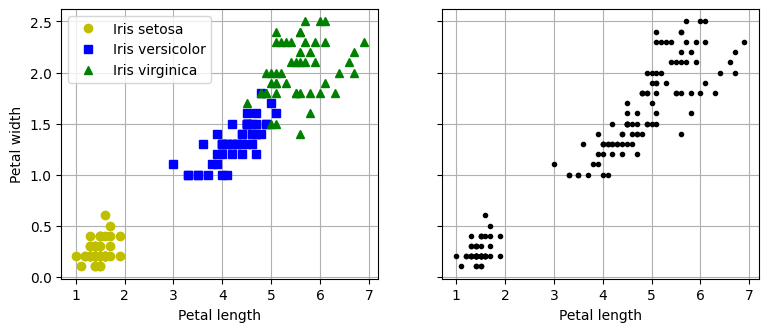

In [1]:
# Figure 9–1

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()
plt.legend()

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

**Key Differences Summary**

| Feature              | Classification Plot (Left)  | Clustering Plot (Right)         |
| -------------------- | --------------------------- | ------------------------------- |
| Uses labels          | Yes (`y`)                   | No                              |
| Color/Marker Meaning | Represents true class       | Uniform — no class info         |
| Type of ML           | Supervised                  | Unsupervised                    |
| Visual Clarity       | Clear separation of species | Ambiguous — must infer clusters |
| Goal                 | Predict known class         | Discover natural groupings      |


**Key Applications of Clustering**

Clustering is incredibly versatile. Here are some top real-world uses:
1. Customer Segmentation

    Group users by behavior or purchases.

    Example: Netflix clustering users to personalize recommendations.

    Used in recommender systems and marketing optimization.

2. Data Analysis

    Quickly understand structure in a new dataset.

    Analyze clusters separately for better insights.

3. Dimensionality Reduction

    Convert high-dimensional data into a few cluster-affinity features.

    Example: Instead of 100 features, you might reduce to 5 cluster affinity scores.

4. Feature Engineering

    Use cluster affinities as new features.

    Improves model performance (e.g., California housing prices).

5. Anomaly Detection

    Points that don’t fit well into any cluster are likely anomalies.

    Example: Detect unusual website behavior or fraud attempts.

6. Semi-Supervised Learning

    Label one instance in a cluster, then propagate the label to the rest.

    Boosts label coverage for supervised models.

7. Search Engines

    Cluster images to enable visual similarity search.

    Return images from the same cluster as the input.

8. Image Segmentation

    Cluster image pixels by color.

    Replace each pixel with its cluster’s average color to simplify the image.

    Used in object detection and tracking.

-----

**In This Section: K-Means and DBSCAN**

We’ll focus on two popular algorithms:

**K-Means Clustering**

    Assumes clusters are spherical and similar in size.

    Works well when:

        Clusters are well separated

        You know the number of clusters (k)

    Fast and widely used.

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

    Finds clusters of arbitrary shape.

    Detects outliers as a side effect.

    No need to specify number of clusters.

    Works well with:

        Irregular or noisy datasets

        Spatial/geographical data

**1. What Is K-Means Clustering?**

K-Means is a fast and efficient clustering algorithm. It groups data into k clusters by minimizing the within-cluster variance, where each cluster is defined by its centroid.

    Simple, fast, and efficient for well-separated, spherical clusters.

    Often used as a baseline method in clustering tasks.


**2. Basic Steps in K-Means Algorithm**

Step-by-Step Summary:

1. Choose `k`: The number of clusters you want.
2. Initialize centroids randomly from the dataset.
3. Assign each data point to the nearest centroid.
4. Update each centroid to the mean of its assigned points.
5. Repeat Steps 3–4 until centroids stop moving (convergence).

The algorithm stops when:

    No labels change, or

    Centroid movement is below a threshold.

> It always converges, but not always to the optimal solution (see local minima below).

Example with `make_blobs`

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

- `y_pred` contains predicted cluster labels.
- You can access:

    Cluster labels: `kmeans.labels_`

    Cluster centroids: `kmeans.cluster_centers_`

Note: Throughout this notebook, when `n_init` was not set when creating a `KMeans` estimator, I explicitly set it to `n_init=10` to avoid a warning about the fact that the default value for this hyperparameter will change from 10 to `"auto"` in Scikit-Learn 1.4.

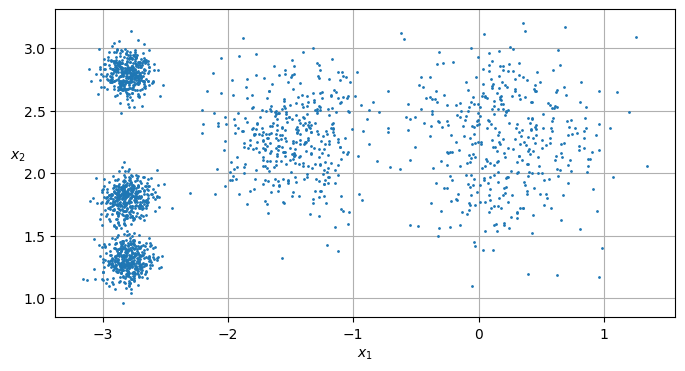

In [3]:
# Figure 9–2

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()

plt.show()

In [4]:
y_pred

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

In [5]:
y_pred is kmeans.labels_

True

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [6]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

In [7]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0], dtype=int32)

Assigning New Points

In [8]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3], dtype=int32)

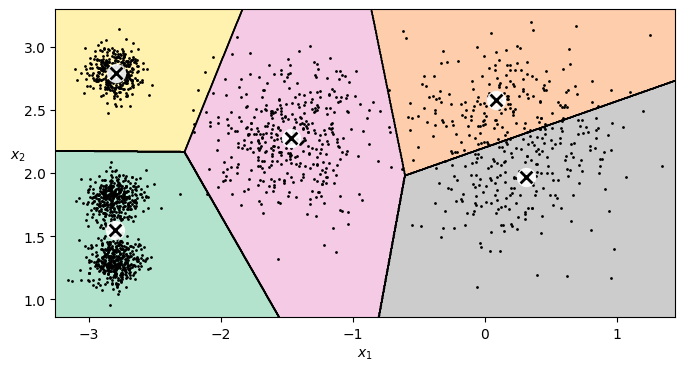

In [9]:
# Figure 9–3

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

**Voronoi Tessellation (Figure 9–3)**
- Visual representation of the decision boundaries between clusters.
- Each region belongs to the nearest centroid.
- Used to understand how space is partitioned.

**Hard vs. Soft Clustering**

Hard Clustering:
    
    Each point belongs to one cluster only

Soft Clustering:

    You calculate the distance (or similarity) of a point to all centroids

In [10]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

Uses:

    Dimensionality reduction (convert features to cluster-affinity)

    Feature engineering (add distance-based features to models)

**Limitations**

| Problem                                               | Explanation                                                   |
| ----------------------------------------------------- | ------------------------------------------------------------- |
| Needs `k` upfront                                  | You must guess the number of clusters.                        |
| Sensitive to initialization                        | Poor starts can lead to **local minima**.                     |
| Assumes equal-size blobs                           | Struggles with clusters of different size, shape, or density. |
| Not ideal for non-spherical or overlapping clusters | Will often misclassify edge points.                           |
`

### The K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:
* First initialize $k$ centroids randomly: e.g., $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class uses an optimized initialization technique by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"` and `n_init=1`. More on this later in this chapter.

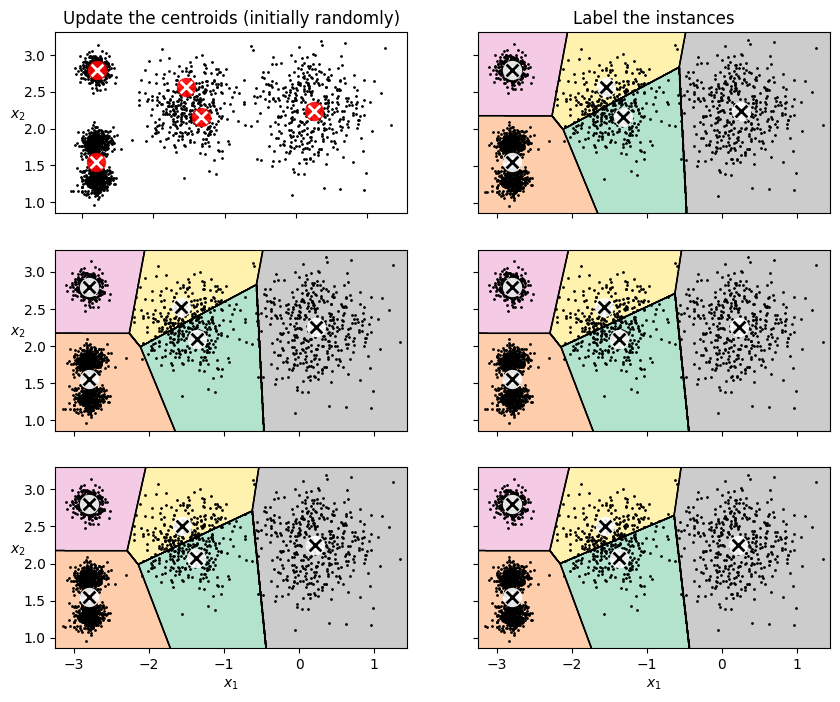

In [11]:
# Figure 9–4

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

**K-Means Variability**

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

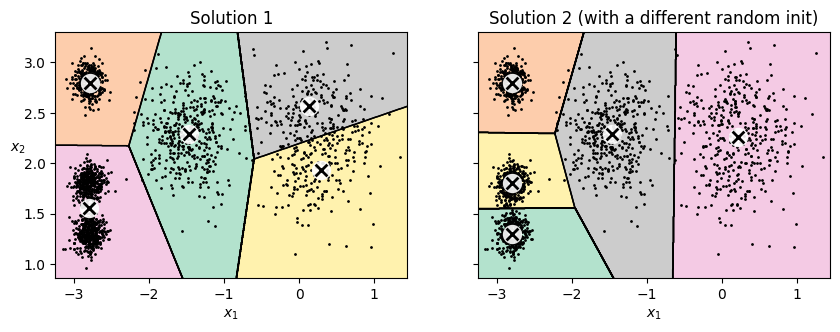

In [12]:
# Figure 9–5

def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=9)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

plt.show()

In [13]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

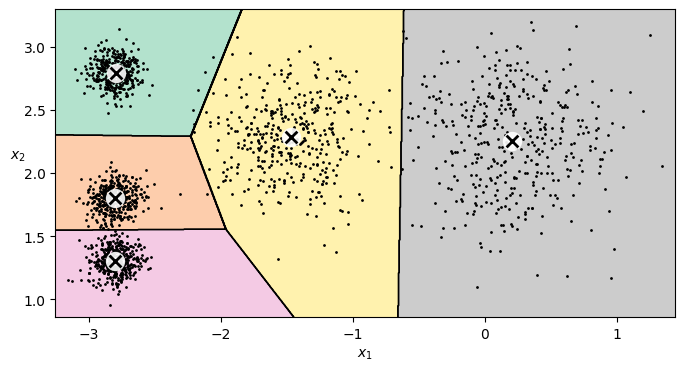

In [14]:
# extra code
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

### Centroid initialization methods

K-Means needs to initialize centroids before clustering starts. This choice can heavily influence:

    Whether the algorithm converges to a good solution or a bad local optimum

    How fast convergence happens

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:
* Take one centroid $c_1$, chosen uniformly at random from the dataset.
* Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
* Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):


**Manual Centroid Initialization**

If you already know good starting points (from domain knowledge or another algorithm), you can manually set centroids.

In [15]:
import numpy as np
from sklearn.cluster import KMeans

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

`n_init=1` ensures the algorithm runs only once (not multiple re-initializations).

**Multiple Random Initializations (`n_init`)**

By default, KMeans runs the algorithm 10 times with different centroid seeds and chooses the one with lowest inertia:

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)  # n_init=10 by default
kmeans.fit(X)

kmeans.inertia_     # Sum of squared distances to closest centroid
kmeans.score(X)     # Negative of inertia

-224.0743312251573

Inertia ≈ internal error:

    Lower = better compactness of clusters.

    But beware: inertia always decreases with more clusters.

#### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [17]:
kmeans.inertia_

224.07433122515727

In [18]:
kmeans_rnd_init1.inertia_ 

219.58201503602288

In [19]:
kmeans_rnd_init2.inertia_ 

211.5985372581684

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_greater is better_" rule.

In [20]:
kmeans.score(X)

-224.07433122515727

**Accelerated K-Means (Elkan’s Algorithm)**
- Use triangle inequality to skip unnecessary distance calculations.
- Track lower/upper bounds between points and centroids.

In [21]:
kmeans = KMeans(n_clusters=5, algorithm="elkan", random_state=42)
kmeans.fit(X)

KMeans(algorithm='elkan', n_clusters=5, random_state=42)

Faster on:

    Large datasets

    Many clusters
        Not always faster—depends on data.

**Mini-Batch K-Means**

    Uses mini-batches instead of full dataset per iteration.

    Updates centroids incrementally (like stochastic gradient descent).

**Benefits:**

    3–4x faster

    Scalable to huge datasets

    Slightly less accurate (higher inertia)

In [22]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

When data doesn't fit in memory:
- Use `memmap` for disk-based arrays
- Or manually feed `partial_fit()` batches

| Method              | Pros                      | Cons                   |
| ------------------- | ------------------------- | ---------------------- |
| `init="random"`     | Simple                    | Risk of poor clusters  |
| `init="k-means++"`  | Best default; more stable | Slightly slower init   |
| `algorithm="elkan"` | Fast on large `k`         | Not always better      |
| `MiniBatchKMeans`   | Handles huge data         | Slightly worse inertia |
| Manual init         | Controlled                | Needs domain knowledge |


100/100

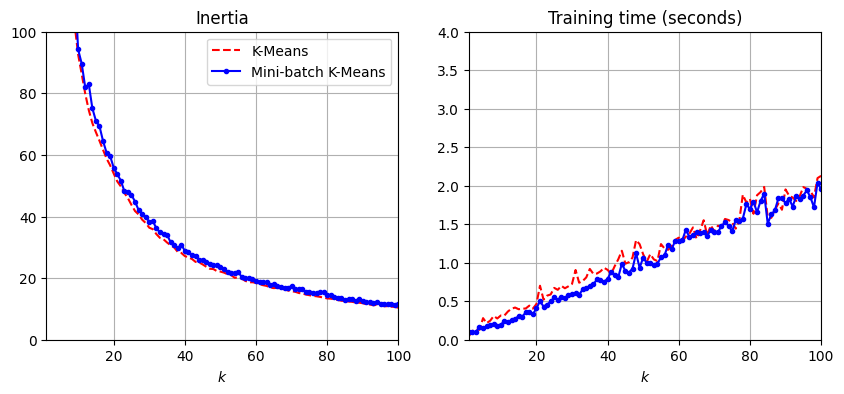

In [23]:
# Figure 9–6

from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

plt.show()

Left Plot: Mini-batch KMeans has slightly higher inertia than full KMeans.

Right Plot: Mini-batch KMeans is ~3.5x faster as k increases.

------

Proper centroid initialization is critical in K-Means. If you're working with clean, manageable datasets, k-means++ with default n_init=10 is usually enough. For large-scale problems or streaming data, MiniBatchKMeans is a smart alternative. And always validate with inertia or silhouette scores to avoid misleading clusters.

### Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 5?

Why Choosing the Right `k` Is Critical

Picking the wrong number of clusters can seriously hurt clustering quality:

    Too few clusters (k too small) → merges separate groups.

    Too many clusters (k too large) → splits cohesive groups.

Getting `k` right improves accuracy, interpretability, and downstream model performance.

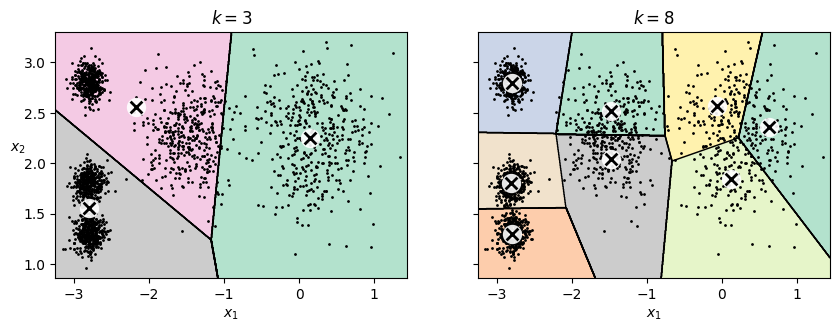

In [24]:
# Figure 9–7

kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

plt.show()

Ouch, these two models don't look great. What about their inertias?

In [25]:
kmeans_k3.inertia_

653.2167190021553

In [26]:
kmeans_k8.inertia_

119.22484592677124

**Why You Can't Just Minimize Inertia**

What is Inertia?

    Inertia = Sum of squared distances between each point and its closest centroid.

    Lower inertia means more compact clusters.

Problem:

    Inertia always decreases as k increases. So if you just minimize inertia, you’ll always end up with k = number of data points, which is useless.
---
> No, we cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

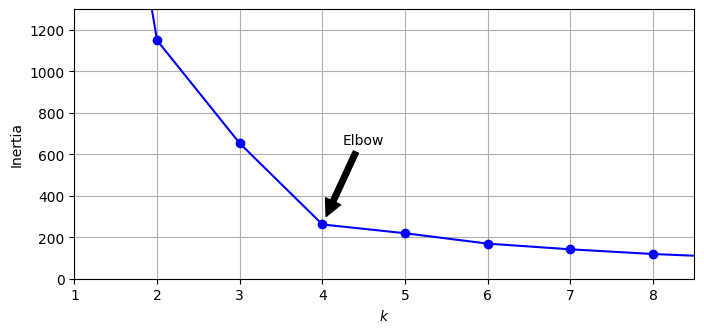

In [27]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()

plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

**Interpretation:**

    Look for the "elbow" point where the rate of decrease slows down.

    That k is a good tradeoff between model simplicity and compactness.

Example: If elbow is at `k = 4`, going beyond 4 gives little benefit but adds complexity.

----
Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. An instance's silhouette coefficient is equal to (_b_ - _a_) / max(_a_, _b_) where _a_ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and _b_ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes _b_, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$:

In [28]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6267891051050735

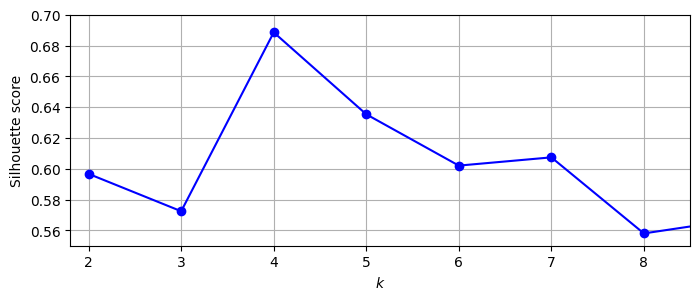

In [29]:
# Figure 9–9

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_:

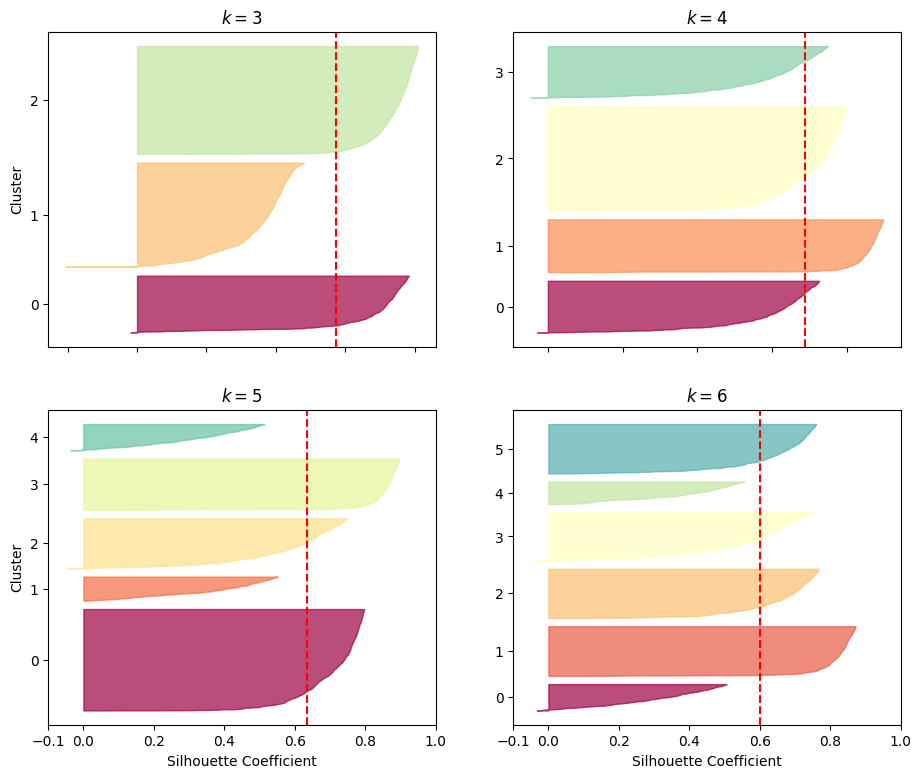

In [30]:
# Figure 9–10

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

As you can see, $k=5$ looks like the best option here, as all clusters are roughly the same size, and they all cross the dashed line, which represents the mean silhouette score.

## Limits of K-Means

Let's generate a more difficult dataset, with elongated blobs and varying densities, and show that K-Means struggles to cluster it correctly:

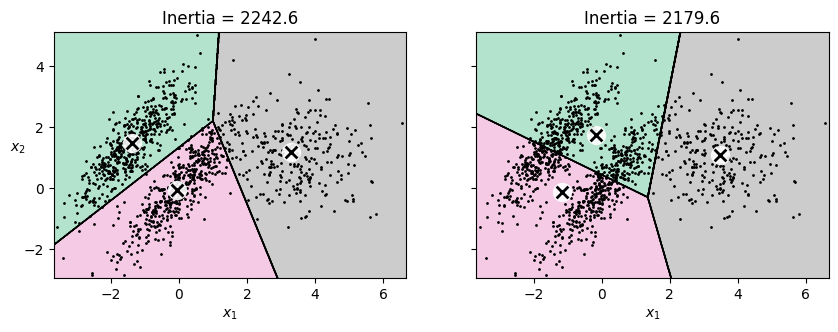

In [31]:
# Figure 9–11

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia = {kmeans_good.inertia_:.1f}")

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia = {kmeans_bad.inertia_:.1f}")

plt.show()

**Limitations of K-Means (Figure 9–11)**

| Weakness                      | Why it matters                                 |
| ----------------------------- | ---------------------------------------------- |
| Requires `k`                  | Must guess or tune                             |
| Sensitive to init             | Bad random starts can ruin results             |
| Prefers spherical clusters    | Fails on elongated, elliptical shapes          |
| Assumes equal cluster density | Not suitable for unbalanced groups             |
| Affected by feature scale     | You **must scale features** (`StandardScaler`) |

Example: On elliptical blobs, K-Means fails even if inertia is low — better to use Gaussian Mixture Models (GMM).

Best Practices
Checklist:
- Use Elbow Method for a quick check.
- Use Silhouette Score for precision.
- Plot Silhouette Diagrams for detail.
- Always scale your features before clustering.
- If shapes/densities vary → try DBSCAN or GMM instead

### Using Clustering for Image Segmentation

**What is Image Segmentation?**

Image segmentation splits an image into regions (segments) based on some criteria like color, object type, or object instance.

**Types of Segmentation:**
1. Color Segmentation (simple, uses clustering):
    - Segments pixels by color similarity.
    - Example: Detecting forests in satellite images.
    - Method used here: K-Means Clustering.

2. Semantic Segmentation:
    - Assigns each pixel to an object type (e.g., all pedestrian pixels → "pedestrian").

3. Instance Segmentation:
    - Distinguishes each object separately.
    - Every pedestrian = separate segment.

---

> in This Section we will Use K-Means clustering to do **color-based segmentation** on an image using Python.

**1. Import and Load the Image**

In [32]:
import urllib.request
from pathlib import Path

# Define the image directory
IMAGES_PATH = Path("images")  # You can change this to any folder you want

# Create the folder if it doesn't exist
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Set the file and its URL
homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename

# Download if the file doesn't exist
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)
else:
    print(f"{filename} already exists at {filepath}")

ladybug.png already exists at images/ladybug.png


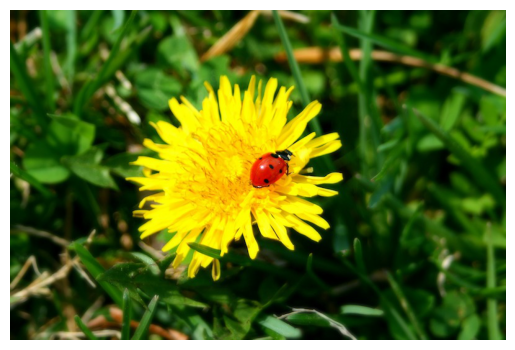

(533, 800, 3)


In [33]:
import PIL
import numpy as np
from sklearn.cluster import KMeans

image = np.asarray(PIL.Image.open(filepath))  # Load and convert to NumPy array
plt.imshow(image)
plt.axis('off')
plt.show()
print(image.shape)

Each pixel is an RGB vector → 3D shape: `(height, width, 3)`

**2. Reshape the Image for Clustering**

In [34]:
X = image.reshape(-1, 3)  # Shape: (533*800, 3) = (426400, 3)

Now `X` is a 2D array of all pixel colors.

**3. Apply K-Means Clustering**

In [35]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

- Clusters the colors into 8 groups.
- Each pixel is assigned to the **nearest cluster center.**

**4. Reconstruct the Segmented Image**

In [36]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]  # Replace pixel with cluster center
segmented_img = segmented_img.reshape(image.shape)

- This maps each pixel to the average color of its cluster.
- Finally, reshape it back to image format.

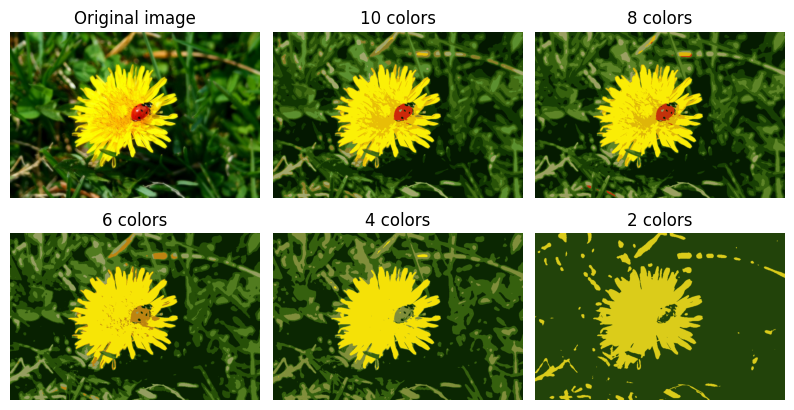

In [37]:
# Figure 9–12

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

**Observations:**
- Too few clusters (e.g., 2 or 3) → important features (like a red ladybug) may vanish.
- Why? K-Means favors equal-sized clusters, not importance.

        Small objects with unique colors might be ignored.

**In Practical**

For small, vivid-colored objects:

    K-Means might not detect them unless you increase cluster count.

    Alternative: Try Mean Shift or Gaussian Mixture Models (more flexible).
---

> Color segmentation with K-means is fast and useful for simple tasks. But for real-world applications like autonomous driving, you’ll need deep learning-based segmentation (e.g., U-Net, Mask R-CNN). K-means is a great place to start and understand clustering visually.

### Using Clustering for Semi-Supervised Learning

The main Problem when we have many unlabeled samples, but few labeled ones (common in real-world AI). Labeling data is expensive.
> Solution: Use Clustering to Help

**Dataset Used: `digits` (from scikit-learn)**

    1,797 grayscale 8×8 digit images (0–9).

    Pretend only 50 labels are known.

**1. Load and Split the Data**

In [38]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

**2. Train on Just 50 Labeled Samples (Baseline)**

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:

In [39]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [40]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [41]:
    # extra code – measure the accuracy when we use the whole training set
    log_reg_full = LogisticRegression(max_iter=10_000)
    log_reg_full.fit(X_train, y_train)
    log_reg_full.score(X_test, y_test)

0.9093198992443325

**3. Cluster the Training Set into 50 Clusters**

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [42]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [43]:
print(len(set(representative_digit_idx)))  # should be 50 unique indices

50


Now let's plot these representative images and label them manually:

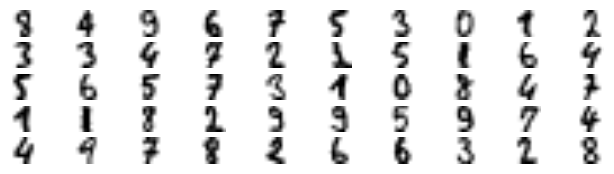

In [44]:
# Figure 9–13

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [45]:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

Wow! We jumped from 74.8% accuracy to 84.9%, although we are still only training the model on 50 instances. Since it's often costly and painful to label instances, especially when it has to be done manually by experts, it's a good idea to make them label representative instances rather than just random instances.

But perhaps we can go one step further: what if we propagated the labels to all the other instances in the same cluster?

In [47]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [48]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

We got another significant accuracy boost! Let's see if we can do even better by ignoring the 1% instances that are farthest from their cluster center: this should eliminate some outliers:

In [50]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

Wow, another accuracy boost! We have even slightly surpassed the performance we got by training on the fully labeled training set!

Our propagated labels are actually pretty good: their accuracy is about 97.6%:

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

You could now do a few iterations of *active learning*:
1. Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters.
2. Train a new model with these additional labels.

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**What is DBSCAN?**

A clustering algorithm that:

    Groups points that are close together (dense areas).

    Marks points in sparse regions as anomalies (noise).

    Can detect arbitrarily shaped clusters.

**How DBSCAN Works:**

For every point:
1. ε-neighborhood: Count how many points are within distance `eps` (ε).
2. If at least `min_samples` in this neighborhood ➜ **Core point.**
3. All neighbors of a core point are in its cluster.
4. Any point not in any core neighborhood ➜ **Anomaly.**

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [54]:
# Cluster labels (-1 means anomaly)
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [55]:
# Core point indices
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [56]:
# Core point data
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

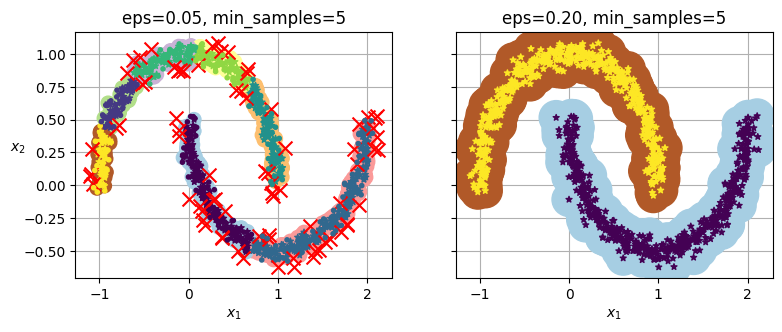

In [57]:
# Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Left subplot (`eps = 0.05`): Too many small clusters + many anomalies (x marks).

Right subplot (`eps = 0.2`): Larger, smoother clusters + fewer anomalies.

This clearly shows how increasing `eps` expands the neighborhood, causing points to group together more easily.

---

In [58]:
dbscan = DBSCAN(eps=0.2, min_samples=5)  # More generous neighborhood

`-1` in `labels_` means noise.

Tweak `eps` to improve results.

----
**Workaround with KNN:**

Use a KNN classifier on core samples:

In [60]:
from sklearn.neighbors import KNeighborsClassifier
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X[dbscan.core_sample_indices_], labels[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [61]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 0, 0, 0])

In [62]:
knn.predict_proba(X_new)

array([[1.],
       [1.],
       [1.],
       [1.]])

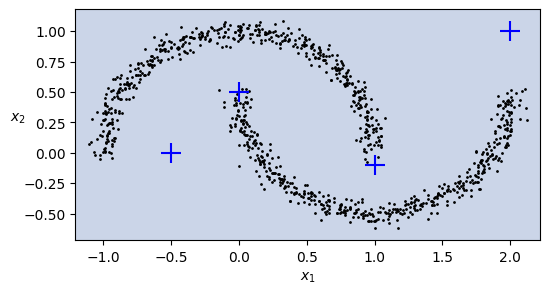

In [63]:
# Figure 9–15

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

**Want to Mark Anomalies in New Data?**

Use `.kneighbors()`:

In [64]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  0, -1])

**Summary of DBSCAN Pros and Cons:**

| Pros                                 |   Cons                                    |
| ------------------------------------ | ----------------------------------------- |
| Detects any **shape** cluster        | Sensitive to `eps`                        |
| Handles **outliers** well            | Struggles with **varying densities**      |
| No need to set number of clusters    | No `.predict()` for new data              |
| Simple: only `eps` and `min_samples` | Poor scaling: O(m × n) for large datasets |

DBSCAN is fantastic for real-world data with noise and irregular shapes (e.g., geographic data, social networks). But it needs careful tuning, and KMeans may still be better if your data is spherical and clean. Combine DBSCAN with visualization tools or HDBSCAN for best results!

**Advanced Tip:**

Try *HDBSCAN* as it is usually better than DBSCAN at finding clusters of varying densities:

> pip install hdbscan
---------

### Other Clustering Algorithms

**1. Agglomerative Clustering**

    Type: Hierarchical (bottom-up).

    Process: Start with each point as its own cluster. At each step, merge the closest pair.

    Output: Dendrogram (cluster tree).

    Pros: Handles non-convex shapes; informative tree structure.

    Cons: Doesn't scale well unless you use a connectivity matrix.

In [65]:
from sklearn.cluster import AgglomerativeClustering

In [66]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [67]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [68]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [69]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

**2. BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)**

    Type: Tree-based, efficient for large datasets.

    Builds a compact tree that summarizes the data.

    Pros: Low memory, fast.

    Cons: Not great if n_features > 20 or data is sparse.


In [70]:
from sklearn.cluster import Birch
model = Birch(n_clusters=3)
labels = model.fit_predict(X)

**3. Mean-Shift**

    Type: Density-based (like DBSCAN).

    Centers circles on data points, shifts them toward local density maxima.

    Pros: Finds arbitrary-shaped clusters; no need to set number of clusters.

    Cons: Very slow for large datasets.

In [71]:
from sklearn.cluster import MeanShift
model = MeanShift()
labels = model.fit_predict(X)

**4. Affinity Propagation**

    Type: Message-passing clustering.

    Each point chooses a representative (exemplar).

    Pros: Finds cluster count automatically; handles uneven cluster sizes.

    Cons: O(m²) complexity – not for large datasets.

In [72]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation()
labels = model.fit_predict(X)

**5. Spectral Clustering**

    Type: Graph-based.

    Uses similarity matrix → reduces dimensionality → applies k-means.

    Pros: Can detect complex structures (like rings or spirals).

    Cons: Doesn’t scale well; struggles with different cluster sizes.

In [73]:
from sklearn.cluster import SpectralClustering

In [74]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

/home/ahmedabdulghany/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:285: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [75]:
sc1.affinity_matrix_.round(2)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [76]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [86]:
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Generate 2D toy dataset (two interleaving moons)
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Step 2: Define visualization function
def plot_spectral_clustering(sc, X, size=500, alpha=0.1, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')  # white edges
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")  # colored by cluster label

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title(f"RBF gamma={sc.gamma}")

# Step 3: Train spectral clustering models
sc1 = SpectralClustering(n_clusters=2, affinity="rbf", gamma=1.0, assign_labels='kmeans', random_state=42)
sc1.fit(X)

sc2 = SpectralClustering(n_clusters=2, affinity="rbf", gamma=100.0, assign_labels='kmeans', random_state=42)
sc2.fit(X)

SpectralClustering(gamma=100.0, n_clusters=2, random_state=42)

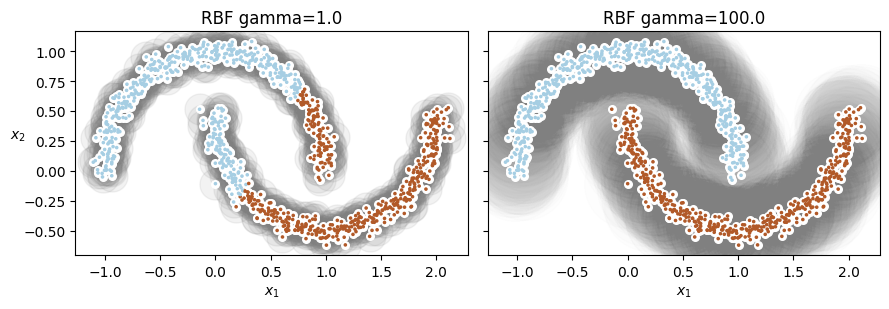

In [87]:
# Step 4: Plot results
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.tight_layout()
plt.show()

**Summery**

| Algorithm                | Handles Arbitrary Shapes   | Auto Clusters | Scales Well | Outlier Robust |
| ------------------------ | -------------------------- | ------------- | ----------- | -------------- |
| **DBSCAN**               | Yes                        | Yes           | No          | Yes            |
| **Agglomerative**        | Yes                        | No            | Partial\*   | No             |
| **BIRCH**                | Partially (spherical only) | No            | Yes         | No             |
| **Mean-Shift**           | Yes                        | Yes           | No          | Yes            |
| **Affinity Propagation** | Yes                        | Yes           | No          | No             |
| **Spectral Clustering**  | Yes                        | No            | No          | No             |

> Agglomerative scales only if sparse connectivity matrix is provided

For most practical use-cases:

    Use DBSCAN or Mean-Shift for discovering natural groups.

    Use Agglomerative if you need a dendrogram or hierarchy.

    Use BIRCH for massive datasets.

    Try Spectral for graph-structured or ring-shaped data.

    Use Affinity Propagation when cluster number is unknown and you have small datasets.

## Gaussian Mixtures

A **GMM** assumes that data points are generated from a mixture of Gaussian distributions. Each distribution represents a cluster.

-  Each instance comes from one Gaussian.
-  You don’t know which one or what the parameters are.
-  Each Gaussian has:

        Mean vector (μ) → center

        Covariance matrix (Σ) → shape, size, orientation

        Weight (ϕ) → probability of choosing that cluster

**What GMMs Can Do**
- Learn clusters with different shapes and orientations (unlike k-means).
- Provide soft cluster assignments (probabilities).
- Estimate cluster parameters using the Expectation-Maximization (EM) algorithm.
- Can generate synthetic data (generative model).
- Can be used for density estimation and anomaly detection.



Let's generate the same dataset as earliers with three ellipsoids (the one K-Means had trouble with):

In [88]:
import numpy as np
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [89]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

**Key Outputs**

In [90]:
gm.weights_         # → Cluster weights (ϕ)

array([0.40005972, 0.20961444, 0.39032584])

In [91]:
gm.means_           # → Cluster centers (μ)

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [92]:
gm.covariances_     # → Covariance matrices (Σ)

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [93]:
gm.converged_       # → Did the EM algorithm converge?

True

In [94]:
gm.n_iter_          # → Number of iterations

4

**Make Predictions**

You can now use the model to predict which cluster each instance belongs to (hard clustering) or the probabilities that it came from each cluster. For this, just use `predict()` method or the `predict_proba()` method:

In [95]:
gm.predict(X)             # Hard cluster assignment

array([2, 2, 0, ..., 1, 1, 1])

In [96]:
gm.predict_proba(X)       # Soft assignment (probabilities)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

In [97]:
# Generate synthetic samples

X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [98]:
y_new

array([0, 0, 1, 1, 1, 2])

Notice that they are sampled sequentially from each cluster.

You can also estimate the log of the _probability density function_ (PDF) at any location using the `score_samples()` method:

In [99]:
gm.score_samples(X)       # Log density estimation

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:

In [100]:
# extra code – bonus material

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225091

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

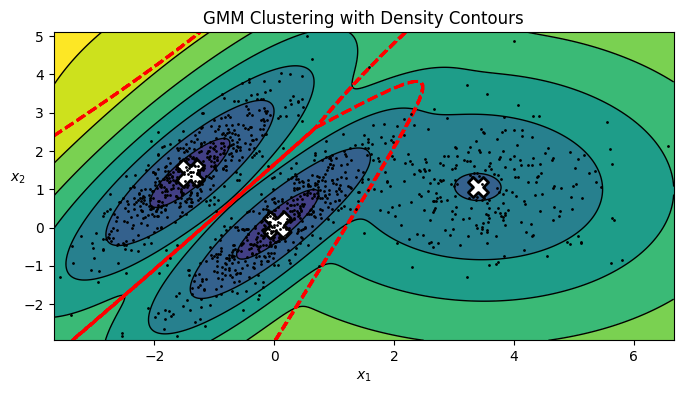

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Create the dataset
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]

# Train the model
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

def plot_centroids(centroids, weights):
    for i in range(len(centroids)):
        plt.scatter(*centroids[i], 
                    s=1000 * weights[i], 
                    marker='X', 
                    edgecolor='k', 
                    facecolor='white', 
                    linewidth=2)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Plot
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.title("GMM Clustering with Density Contours")
plt.show()

You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances).
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.

in a simple way

| Type          | Description                                                |
| ------------- | ---------------------------------------------------------- |
| `"spherical"` | Spheres of different sizes (only one variance per cluster) |
| `"diag"`      | Ellipsoids aligned with axes (diagonal covariance)         |
| `"tied"`      | All clusters share same full covariance                    |
| `"full"`      | Each cluster has its own full covariance (default)         |

Use simpler types (like `"spherical"` or `"diag"`) for high-dimensional data or small datasets.

**Computational Complexity**
- Low (fast): `"spherical"` or `"diag"` → `O(kmn)`
- Higher: `"tied"` or `"full"` → `O(kmn + kn²)`

Where:
- `k`: number of clusters
- `m`: number of instances
- `n`: number of features

In Practical

    Clustering with complex shapes (better than k-means).

    Image segmentation

    Speech recognition

    Density estimation for anomaly detection

    Simulating new data

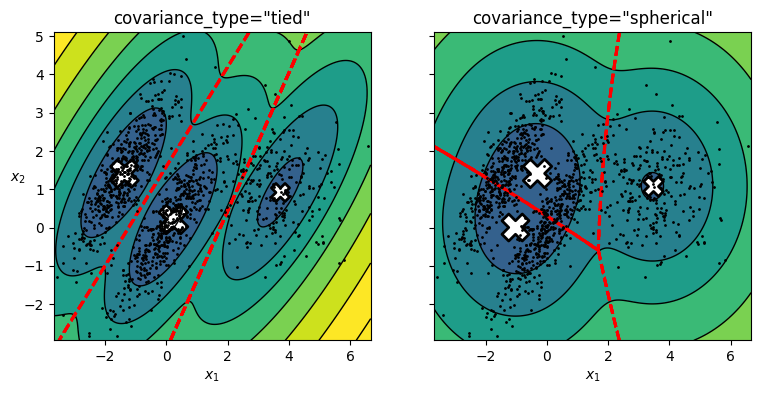

In [102]:
# Figure 9–17

gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

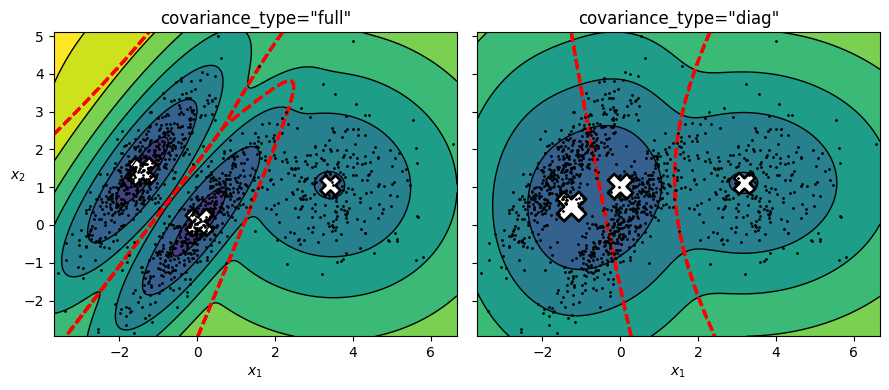

In [103]:
# comparing covariance_type="full" and covariance_type="diag"
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

GMMs are one of the most flexible clustering tools available. They're ideal when your clusters are not spherical and when you need a probabilistic view of your data. They're also great for generative modeling and anomaly detection. However, they can struggle with high-dimensional or sparse data, and like k-means, are sensitive to initialization.

Use GMM when k-means is too simple, but don’t assume it will always work out of the box. Use constraints or dimensionality reduction if needed.

-----------------


### Anomaly Detection Using Gaussian Mixtures

Gaussian Mixtures can be used for _anomaly detection_: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 2%, then you can set the density threshold to be the value that results in having 2% of the instances located in areas below that threshold density:

The `score_samples()` method returns the log of the probability density at each point

In [104]:
densities = gm.score_samples(X)

If you want to flag, for example, the lowest 2% density points as anomalies, set a threshold like this:

In [105]:
density_threshold = np.percentile(densities, 2)

In [106]:
anomalies = X[densities < density_threshold]

Now `anomalies` contains all the points considered abnormal based on your threshold.

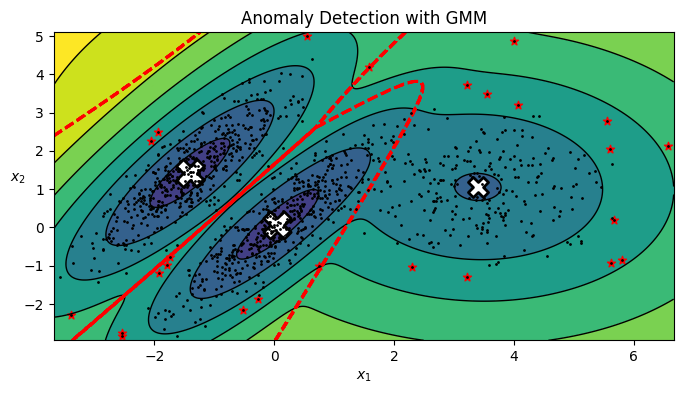

In [107]:
# Figure 9–18 to Visualize Anomalies

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1) 
plt.title("Anomaly Detection with GMM")
plt.show()

**Tips & Caveats**
- GMM tries to model all the data, including outliers. Too many outliers? The model gets biased.
- Solution: Train, detect & remove extreme outliers → retrain.
- Alternatively, use robust models like `EllipticEnvelope`

> from sklearn.covariance import EllipticEnvelope

### Selecting the Number of Clusters

We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ is the number of instances.
* $p$ is the number of parameters learned by the model.
* $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

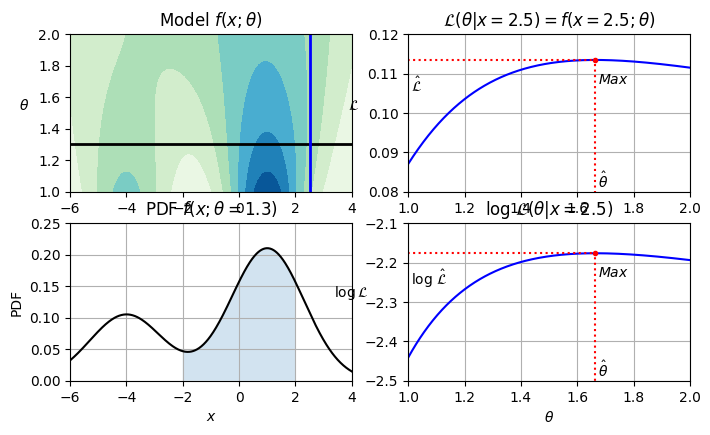

In [108]:
# Figure 9–19

from scipy.stats import norm

x_val = 2.5
std_val = 1.3
x_range = [-6, 4]
x_proba_range = [-2, 2]
stds_range = [1, 2]

xs = np.linspace(x_range[0], x_range[1], 501)
stds = np.linspace(stds_range[0], stds_range[1], 501)
Xs, Stds = np.meshgrid(xs, stds)
Z = 2 * norm.pdf(Xs - 1.0, 0, Stds) + norm.pdf(Xs + 4.0, 0, Stds)
Z = Z / Z.sum(axis=1)[:, np.newaxis] / (xs[1] - xs[0])

x_example_idx = (xs >= x_val).argmax()  # index of the first value >= x_val
max_idx = Z[:, x_example_idx].argmax()
max_val = Z[:, x_example_idx].max()
s_example_idx = (stds >= std_val).argmax()
x_range_min_idx = (xs >= x_proba_range[0]).argmax()
x_range_max_idx = (xs >= x_proba_range[1]).argmax()
log_max_idx = np.log(Z[:, x_example_idx]).argmax()
log_max_val = np.log(Z[:, x_example_idx]).max()

plt.figure(figsize=(8, 4.5))

plt.subplot(2, 2, 1)
plt.contourf(Xs, Stds, Z, cmap="GnBu")
plt.plot([-6, 4], [std_val, std_val], "k-", linewidth=2)
plt.plot([x_val, x_val], [1, 2], "b-", linewidth=2)
plt.ylabel(r"$\theta$", rotation=0, labelpad=10)
plt.title(r"Model $f(x; \theta)$")

plt.subplot(2, 2, 2)
plt.plot(stds, Z[:, x_example_idx], "b-")
plt.plot(stds[max_idx], max_val, "r.")
plt.plot([stds[max_idx], stds[max_idx]], [0, max_val], "r:")
plt.plot([0, stds[max_idx]], [max_val, max_val], "r:")
plt.text(stds[max_idx]+ 0.01, 0.081, r"$\hat{\theta}$")
plt.text(stds[max_idx]+ 0.01, max_val - 0.006, r"$Max$")
plt.text(1.01, max_val - 0.008, r"$\hat{\mathcal{L}}$")
plt.ylabel(r"$\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\mathcal{{L}}(\theta|x={x_val}) = f(x={x_val}; \theta)$")
plt.grid()
plt.axis([1, 2, 0.08, 0.12])

plt.subplot(2, 2, 3)
plt.plot(xs, Z[s_example_idx], "k-")
plt.fill_between(xs[x_range_min_idx:x_range_max_idx+1],
                 Z[s_example_idx, x_range_min_idx:x_range_max_idx+1], alpha=0.2)
plt.xlabel(r"$x$")
plt.ylabel("PDF")
plt.title(fr"PDF $f(x; \theta={std_val})$")
plt.grid()
plt.axis([-6, 4, 0, 0.25])

plt.subplot(2, 2, 4)
plt.plot(stds, np.log(Z[:, x_example_idx]), "b-")
plt.plot(stds[log_max_idx], log_max_val, "r.")
plt.plot([stds[log_max_idx], stds[log_max_idx]], [-5, log_max_val], "r:")
plt.plot([0, stds[log_max_idx]], [log_max_val, log_max_val], "r:")
plt.text(stds[log_max_idx]+ 0.01, log_max_val - 0.06, r"$Max$")
plt.text(stds[log_max_idx]+ 0.01, -2.49, r"$\hat{\theta}$")
plt.text(1.01, log_max_val - 0.08, r"$\log \, \hat{\mathcal{L}}$")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\log\mathcal{L}$", rotation=0, labelpad=10)
plt.title(fr"$\log \, \mathcal{{L}}(\theta|x={x_val})$")
plt.grid()
plt.axis([1, 2, -2.5, -2.1])

plt.show()

**What Each Subplot Shows:**



**Top-Left Plot (2,2,1): Contour plot of the model**

- **X-axis:** `x`  
- **Y-axis:** `θ`  
- The contour colors show values of the function \( f(x; \theta) \).  
- Two lines are highlighted:
  - **Black horizontal line** at \( \theta = 1.3 \) (your `std_val`)
  - **Blue vertical line** at \( x = 2.5 \) (your `x_val`)  
- This plot shows how the PDF changes with both `x` and `θ`.



**Top-Right Plot (2,2,2): Likelihood vs \( \theta \)**

- Plots the **likelihood** \( f(x = 2.5; \theta) \) as a function of \( \theta \).  
- \( \hat{\theta} \) is the value of \( \theta \) that **maximizes** this likelihood (Maximum Likelihood Estimate).  
- A **red dot and dashed lines** highlight this maximum point.  
- Labels:
  - `$Max$` — the maximum likelihood value
  - `$𝜃̂$` — the optimal parameter
  - `$𝓛̂$` — estimated maximum likelihood  



**Bottom-Left Plot (2,2,3): PDF at \( \theta = 1.3 \)**

- **X-axis:** `x`  
- **Y-axis:** \( f(x; \theta = 1.3) \)  
- Shows the PDF curve for a fixed standard deviation.  
- The shaded area between \( x = -2 \) and \( x = 2 \) visualizes the **probability mass** in that region.



**Bottom-Right Plot (2,2,4): Log-Likelihood vs \( \theta \)**

- Plots the **log-likelihood** \( \log \mathcal{L}(\theta \mid x=2.5) \).  
- Useful when likelihood values are very small, as log scales handle them better numerically.  
- Similar to the top-right plot but uses `log(𝓛)` instead of `𝓛`.


**AIC = Akaike Information Criterion**

Use: Penalizes model complexity to prevent overfitting.

> Lower AIC is better.


In [109]:
gm.bic(X)

8189.733705221636

**BIC = Bayesian Information Criterion**

Use: Stronger penalty than AIC for models with more parameters.

> Lower BIC is better.


In [110]:
gm.aic(X)

8102.508425106598

Always check both AIC and BIC. AIC may favor slightly more complex models, while BIC tends to be stricter — especially useful when you suspect overfitting.

**We could compute the BIC manually like this:**

In [111]:
# extra code – bonus material
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.733705221636
aic = 8102.508425106598
n_params = 17


There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n \times n$ covariance matrix is not $n^2$, but $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.

Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

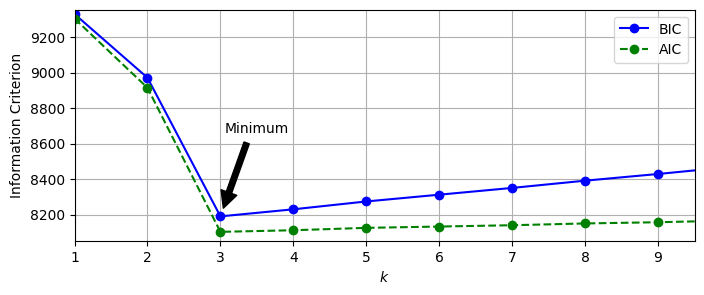

In [112]:
# Figure 9–20

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()

plt.show()

**Novelty Detection vs Anomaly Detection**

| Feature       | Anomaly Detection                    | Novelty Detection                 |
| ------------- | ------------------------------------ | --------------------------------- |
| Training data | May include anomalies                | Assumed "clean" (no outliers)     |
| Use case      | Detect outliers in existing data     | Detect if new data is abnormal    |
| Tool examples | `GaussianMixture`, `IsolationForest` | `OneClassSVM`, `EllipticEnvelope` |

Using GMMs for anomaly detection is powerful when your data has well-defined Gaussian-like clusters. It's more flexible than k-means but can be biased by outliers. AIC/BIC are solid tools for choosing the number of clusters—use them to avoid guesswork.

If your data is high-dimensional or noisy, consider robust methods or dimensionality reduction first.

----------------

### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, it is possible to use instead the `BayesianGaussianMixture` class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

**How to use it:**
Set `n_components` to a value you believe is **greater than** the expected number of clusters. The model will **shrink** the redundant components.

In [113]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

The algorithm automatically detected that only 3 components are needed!

The rest received zero weight.

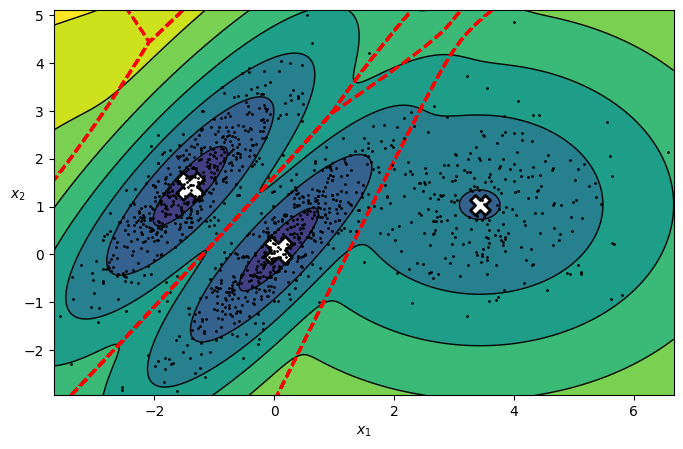

In [114]:
# this figure is almost identical to Figure 9–16
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

/home/ahmedabdulghany/anaconda3/lib/python3.10/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


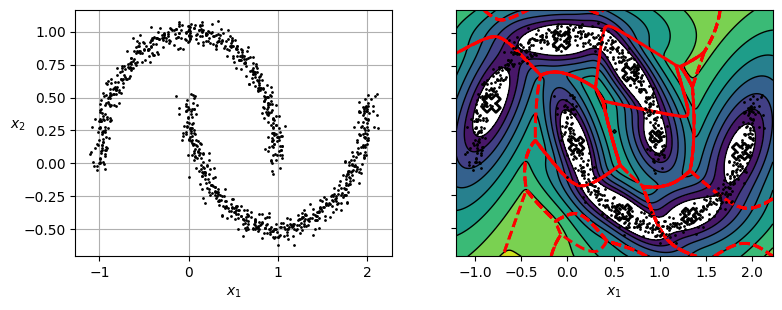

In [115]:
# Figure 9–21

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

Oops, not great... instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters. However, the density plot does not look too bad, so it might be usable for anomaly detection.

**Limitations**
  
Gaussian Mixture Models work well for ellipsoidal clusters, but fail with complex shapes.
For example, applying this to the `moons` dataset will lead the model to force ellipsoids, producing many false clusters.

---

### Other Algorithms for Anomaly and Novelty Detection

Scikit-Learn offers several alternatives for outlier or novelty detection:

**EllipticEnvelope (Fast-MCD)**

    Fits an elliptical envelope around the inliers.

    Assumes data is from a single Gaussian distribution.

    Ignores outliers when estimating covariance.

    Useful for outlier cleanup.

**Isolation Forest**

    Efficient for high-dimensional data.

    Builds trees by random splits on features and thresholds.

    Anomalies isolate faster than normal points.

    Good for large datasets.

**Local Outlier Factor (LOF)**

    Compares local density of a point with its neighbors.

    Anomalies have much lower density than neighbors.

    No need to label anomalies.

**One-Class SVM**

    Great for novelty detection (not outliers).

    Learns a tight boundary around the known class.

    Flags anything outside as an anomaly.

    Needs tuning (kernel, margin).

    Does not scale well to large datasets.

**PCA (or any method with `inverse_transform`)**

    Use reconstruction error as anomaly score.

    Anomalies will have larger reconstruction error than normal data.

    Simple, efficient, and scalable.